# Set up your notebook

In [2]:
# import libraries
# set up plot configurations (if required)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import gensim
%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\gensim-2.2.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df = pd.read_csv("C:/Users/n0rv1/Desktop/DataScience/DS-SG-04/projects/unit-projects/project-4/assets/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Executive Summary

- Come back to this after your analysis has been completed.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

Determine how likely a passenger onboard Titanic will survive, using passenger ticketing data (sex, age, SibSp, Parch, Fare, Cabin, Embarked)

## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation

## Risks and Assumptions

## Hypothesis

Null hypothesis, $H_0$: there is no relationship between age, sex and survivability

Alternative hypothesis, $H_1$: Female passengers are more likely to survive as compared to male passengers

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:

df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


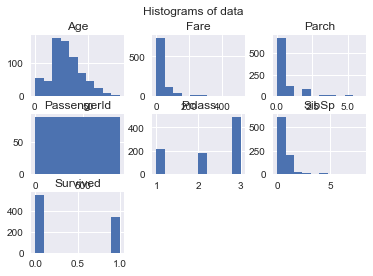

In [7]:
plt.figure(figsize=(10,10))
df.hist()
plt.suptitle("Histograms of data")

In [8]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [9]:
print df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


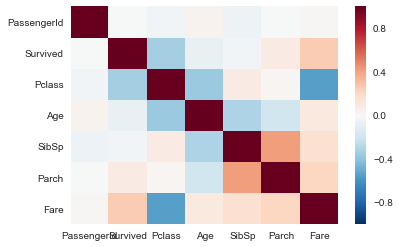

In [10]:
sns.heatmap(df.corr())

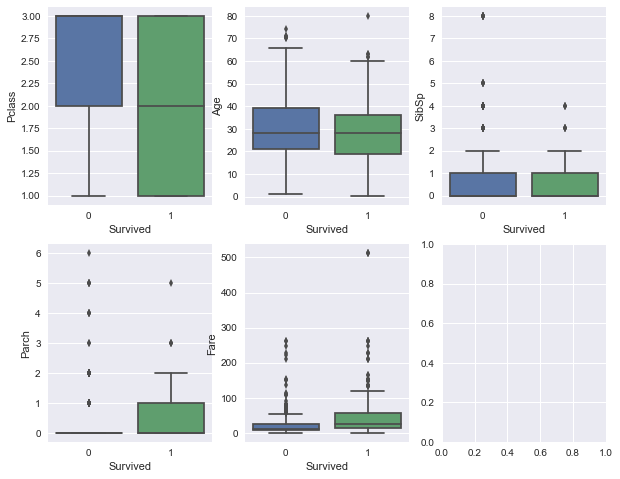

In [11]:
fig, ax = plt.subplots(2,3, figsize=(10,8))
sns.boxplot(x="Survived", y="Pclass", data = df, ax=ax[0,0])
sns.boxplot(x="Survived", y="Age", data = df, ax=ax[0,1])
sns.boxplot(x="Survived", y="SibSp", data = df, ax=ax[0,2])
sns.boxplot(x="Survived", y="Parch", data = df, ax=ax[1,0])
sns.boxplot(x="Survived", y="Fare", data = df, ax=ax[1,1])

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
df[['Survived','Pclass','Fare']].corr()

,Survived,Pclass,Fare
Survived,1.000000,-0.338481,0.257307
Pclass,-0.338481,1.000000,-0.549500
Fare,0.257307,-0.549500,1.000000


In [14]:
#There seem to be correlation among Pclass, Fare and survivability

# Data Cleaning

- Prepare your dataset for modeling

In [15]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
#count number of null values for each variable
count_null=len(df)-df.count()
print count_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
#drop column 'cabin' given the significant missing values
df_clean = df.drop(df.columns[10],1)

In [18]:
#confirm deletion of column 'cabin'
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#drop NA
df_clean = df_clean.dropna()
df_clean.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

In [20]:
df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [21]:
df_clean.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [22]:
df_clean = df_clean.join(pd.get_dummies(df_clean['Sex'],drop_first = False, prefix = 'Sex'))

In [23]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [24]:
df_clean2=df_clean.drop(df_clean.columns[[3,8]],1)

In [40]:
df_clean2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [42]:
df_clean2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764,0.636236
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.481420
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,1.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [43]:
#Scale predictor before fit the model
factors = ['Pclass','Sex_male','Sex_female','Age','SibSp','Parch','Fare']
X = StandardScaler().fit_transform(df_clean2[factors])
y = df_clean2['Survived']

In [44]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [45]:
#model 1
knn = KNeighborsClassifier(5).fit(X_train, y_train)

In [46]:
predict = knn.predict(X_train)

In [47]:
#check accuracy on training dataset
metrics.accuracy_score(predict, y_train)

0.848314606741573

In [48]:
#check accuracy on test dataset
predict = knn.predict(X_test)
metrics.accuracy_score(predict,y_test)

0.7865168539325843

In [33]:
#use kfold method to run a model
kf = KFold(n_splits = 10, random_state=10, shuffle = True)
scores = []
for train_index, test_index in kf.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    dfX_train = pd.DataFrame(X_train)
    dfX_test = pd.DataFrame(X_test)
    dfy_train = pd.DataFrame(y_train)
    dfy_test = pd.DataFrame(y_test)

In [49]:
print dfy_train

     Survived
0         0.0
1         1.0
2         1.0
3         1.0
5         NaN
6         0.0
7         0.0
9         1.0
10        1.0
11        1.0
12        0.0
14        0.0
16        0.0
17        NaN
18        0.0
19        NaN
20        0.0
21        1.0
22        1.0
23        1.0
24        0.0
25        1.0
26        NaN
27        0.0
28        NaN
29        NaN
30        0.0
31        NaN
32        NaN
33        0.0
..        ...
678       0.0
679       1.0
680       NaN
681       1.0
682       0.0
684       0.0
685       0.0
686       0.0
687       0.0
688       0.0
689       1.0
693       0.0
694       0.0
695       0.0
696       0.0
697       NaN
698       0.0
699       0.0
700       1.0
701       1.0
702       0.0
703       0.0
704       0.0
705       0.0
706       1.0
707       1.0
708       1.0
709       NaN
710       1.0
711       NaN

[641 rows x 1 columns]


In [50]:
print dfy_test

     Survived
4         0.0
8         1.0
13        0.0
15        1.0
40        0.0
44        1.0
54        0.0
71        0.0
73        0.0
74        1.0
77        NaN
89        0.0
93        0.0
122       0.0
123       1.0
125       1.0
135       0.0
156       1.0
182       0.0
200       0.0
216       1.0
239       0.0
256       NaN
265       0.0
283       1.0
290       1.0
320       0.0
321       0.0
342       0.0
344       0.0
..        ...
420       NaN
430       1.0
453       1.0
461       0.0
464       NaN
468       NaN
472       1.0
490       NaN
496       1.0
502       NaN
527       NaN
528       0.0
530       1.0
543       1.0
545       0.0
574       0.0
606       0.0
630       1.0
645       1.0
652       0.0
653       NaN
656       NaN
657       0.0
665       0.0
670       1.0
676       0.0
683       0.0
690       1.0
691       1.0
692       NaN

[71 rows x 1 columns]


In [34]:
dfX_train.head()

,0,1,2,3,4,5,6
0,0.908600,0.756138,-0.756138,-0.527669,0.522511,-0.506787,-0.516380
1,-1.482983,-1.322511,1.322511,0.577094,0.522511,-0.506787,0.694046
2,0.908600,-1.322511,1.322511,-0.251478,-0.552714,-0.506787,-0.503620
3,-1.482983,-1.322511,1.322511,0.369951,0.522511,-0.506787,0.350326
4,-1.482983,0.756138,-0.756138,1.681856,-0.552714,-0.506787,0.326933


In [35]:
dfX_train.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [36]:
dfX_test.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [37]:
dfy_train.isnull().any()

Survived    True
dtype: bool

In [38]:
dfy_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
5,NaN


In [39]:
dfy_test.isnull().any()

Survived    True
dtype: bool

In [32]:
print X_train

[[ 0.90859974  0.75613751 -0.75613751 ...,  0.52251079 -0.50678737
  -0.51637992]
 [-1.48298257 -1.32251077  1.32251077 ...,  0.52251079 -0.50678737
   0.69404605]
 [ 0.90859974 -1.32251077  1.32251077 ..., -0.55271372 -0.50678737
  -0.50362035]
 ..., 
 [-1.48298257 -1.32251077  1.32251077 ..., -0.55271372 -0.50678737
  -0.08633507]
 [-1.48298257  0.75613751 -0.75613751 ..., -0.55271372 -0.50678737
  -0.08633507]
 [ 0.90859974  0.75613751 -0.75613751 ..., -0.55271372 -0.50678737
  -0.50692839]]


In [33]:
print X_test

[[  9.08599738e-01   7.56137507e-01  -7.56137507e-01   3.69950919e-01
   -5.52713724e-01  -5.06787373e-01  -5.01257467e-01]
 [ -2.87191414e-01  -1.32251077e+00   1.32251077e+00  -1.08004977e+00
    5.22510788e-01  -5.06787373e-01  -8.49967370e-02]
 [  9.08599738e-01  -1.32251077e+00   1.32251077e+00  -1.08004977e+00
   -5.52713724e-01  -5.06787373e-01  -5.04958689e-01]
 [  9.08599738e-01   7.56137507e-01  -7.56137507e-01  -1.90862160e+00
    3.74818432e+00   6.64747074e-01  -1.02875261e-01]
 [ -1.48298257e+00   7.56137507e-01  -7.56137507e-01   2.44138048e+00
   -5.52713724e-01   6.64747074e-01   5.18169991e-01]
 [  9.08599738e-01   7.56137507e-01  -7.56137507e-01  -1.28719273e+00
    4.82340884e+00   1.83628152e+00   2.33126814e-01]
 [ -2.87191414e-01   7.56137507e-01  -7.56137507e-01  -5.96716209e-01
   -5.52713724e-01  -5.06787373e-01   7.35948483e-01]
 [  9.08599738e-01   7.56137507e-01  -7.56137507e-01  -2.51477949e-01
    5.22510788e-01   1.83628152e+00  -2.64496512e-01]
 [ -1.48

In [34]:
#use kfold method to run a model
kf = KFold(n_splits = 10, random_state=10, shuffle = True)
scores = []
for train_index, test_index in kf.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    knn = KNeighborsClassifier(5).fit(X_train,y_train)
    predict=knn.predict(X_test)
    accuracy = metrics.accuracy_score(predict, y_test)
    scores.append(accuracy)
    #print "Accuracy: " + accuracy
#print "Mean Accuracy: " + np.mean(scores)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# What does your analysis show?

- What are your findings (in relation to your problem statement)?

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)